In [ ]:
# How to code a Q-Q plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = model.resid
fig = sm.qqplot(residuals, line = 's')
plt.show()

In [4]:
# Simple linear regression follow along lab
# Import packages
import pandas as pd
import seaborn as sns

In [5]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
# Data cleaning
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

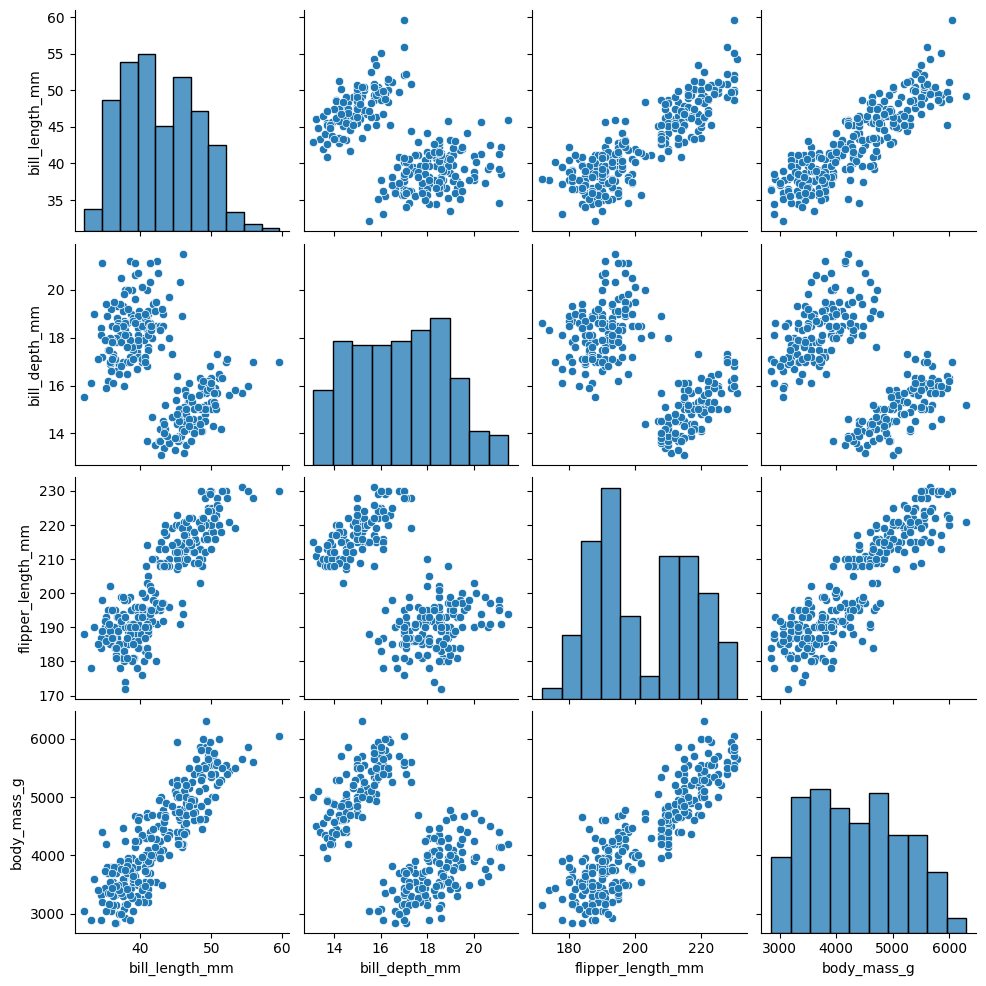

In [7]:
#  Exploratory data analysis
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

In [8]:
# Model construction
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [9]:
# Next, you can construct the linear regression formula, and save it as a string.
# Remember that the y or dependent variable comes before the ~, and the x or independent variables comes 
# after the ~.
# Note: The names of the x and y variables have to exactly match the column names in the dataframe.

# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

In [10]:
# Lastly, you can build the simple linear regression model in statsmodels using the ols() function. 
# You can import the ols() function directly using the line of code below.

# Import ols function
from statsmodels.formula.api import ols


In [11]:
# Then, you can plug in the ols_formula and ols_data as arguments in the ols() function. 
# After you save the results as a variable, you can call on the fit() function to actually fit the model 
# to the data.

# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [12]:
# Lastly, you can call the summary() function on the model object to get the coefficients and more 
# statistics about the model. The output from model.summary() can be used to evaluate the model and 
# interpret the results. Later in this section, we will go over how to read the results of the model output.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.33e-85
Time:                        14:54:47   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

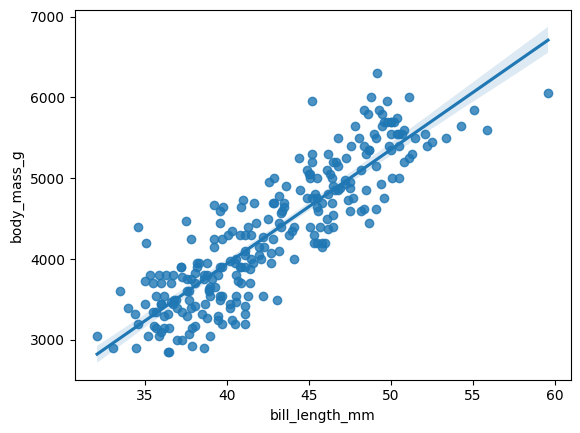

In [13]:
# You can use the regplot() function from seaborn to visualize the regression line.
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

In [14]:
# Finish checking model assumptions
# The normality and homoscedasticity assumptions focus on the distribution of errors. 
# Thus, you can only check these assumptions after you have constructed the model. To check these 
# assumptions, you will check the residuals, as an approximation of the errors
# To more easily check the model assumptions and create relevant visualizations, you can first subset 
# the X variable by isolating just the bill_length_mm column. Additionally, you can save the predicted 
# values from the model using the model.predict(X) function.

# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [15]:
# Then, you can save the model residuals as a variable by using the model.resid attribute.

# Calculate residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

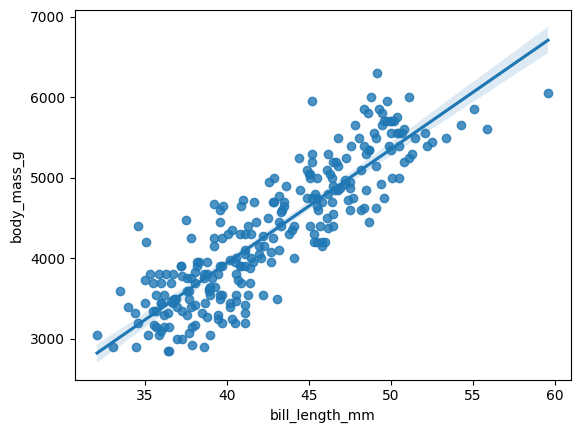

In [18]:
# You can use the regplot() function from seaborn to visualize the regression line.
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

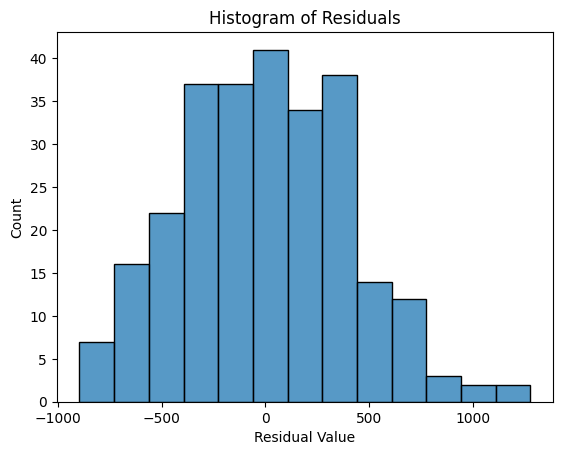

In [16]:
# Check the normality assumption
# To check the normality assumption, you can create a histogram of the residuals using the histplot() 
# function from the seaborn package
# From the below histogram, you may notice that the residuals are almost normally distributed. 
# In this case, it is likely close enough that the assumption is met.

import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()


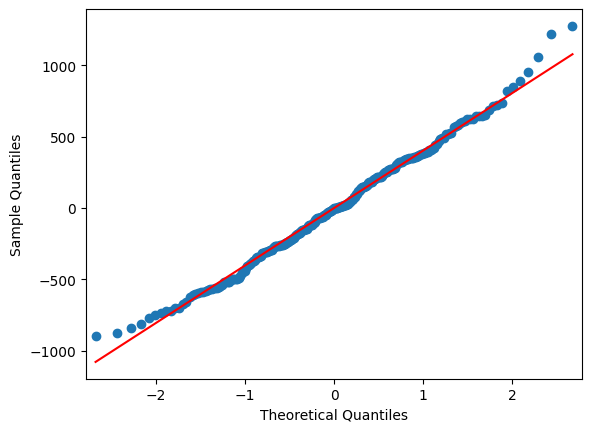

In [17]:
# Another way to check the normality function is to create a quantile-quantile or Q-Q plot. 
# Recall that if the residuals are normally distributed, you would expect a straight diagonal line 
# going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using 
# the qqplot function from the statsmodels.api package.
# The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally 
# distributed, except at the ends of the distribution

import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

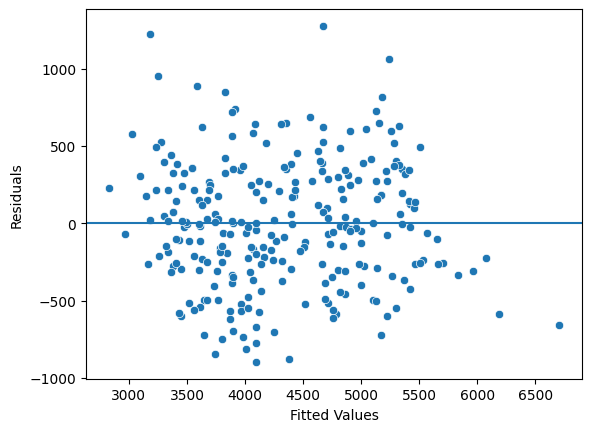

In [19]:
# Check the homoscedasticity assumption
# Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, 
# you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud 
# (i.e., the residuals are scattered randomly), then the assumption is likely met.
# You can create one scatterplot by using the scatterplot() function from the seaborn package. 
# The first argument is the variable that goes on the x-axis. The second argument is the variable 
# that goes on the y-axis

# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

In [20]:
#  Code Functions and documentation
#  Subset just Chinstrp penguins from data set
chinstrap_penguins = penguins[penguins['species'] == 'Chinstrap']

#  Reset index of dataframe
chinstrap_penguins.reset_index(inplace = True, drop = True)


In [21]:
#   Setup for model construction
# Now that the data is clean, you are able to plot the data and construct a linear regression model. 
# First, extract the one X variable, bill_depth_mm, and the one Y variable, flipper_length_mm, that you 
# are targeting.

# Subset Data
ols_data = chinstrap_penguins[["bill_depth_mm", "flipper_length_mm"]]

In [22]:
# Because this example is using statsmodels, save the ordinary least squares formula as a string so the 
# computer can understand how to run the regression. The Y variable, flipper_length_mm comes first, 
# followed by a tilde and the name for the X variable, bill_depth_mm.

# Write out formula
ols_formula = "flipper_length_mm ~ bill_depth_mm"

In [23]:
#  Construct the model
# In order to construct the model, you’ll first need to import the ols function from the 
# statsmodels.formula.api interface.

# Import ols function
from statsmodels.formula.api import ols

In [24]:
# Next, plug in the formula and the saved data into the ols function. 
# Then, use the fit method to fit the model to the data. Lastly, use the summary method 
# to get the results from the regression model. 

# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.48
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.16e-07
Time:                        15:13:27   Log-Likelihood:                -215.62
No. Observations:                  68   AIC:                             435.2
Df Residuals:                      66   BIC:                             439.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       128.6967     11.623     11.073      0.000     105.492     151.902
bill_depth_mm     3.6441      0.630      5.786      0.000       2.387       4.902
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.837
Skew:                          -0.255   Prob(JB):                        0.658
Kurtosis:                       3.190   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Model predictions and residuals
predictions = model.predict(chinstrap_penguins[["bill_depth_mm"]])
residuals = model.resid


In [1]:
# Activity: Run simple linear regression
# Import relevant Python libraries and modules.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#  Load dataset

data = pd.read_csv(r"D:\VSCODE\marketing_sales_data.csv")

In [3]:
# Data exploration
#  Show the first 10 rows of the data

data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [4]:
# Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.
# Display number of rows, number of columns.
data.shape

(572, 5)

In [5]:
# check for missing values in the rows of the data
# Start with .isna() to get booleans indicating whether each value in the data is missing.
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [6]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns 
# in each row.
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [8]:
# Use .sum() to get the number of rows that contain missing values.
data.isna().any(axis=1).sum()

np.int64(3)

In [9]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing 
# values to be dropped. To update the DataFrame, reassign it to the result.
data =data.dropna(axis=0)

In [10]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns 
# in each row.
# Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

np.int64(0)

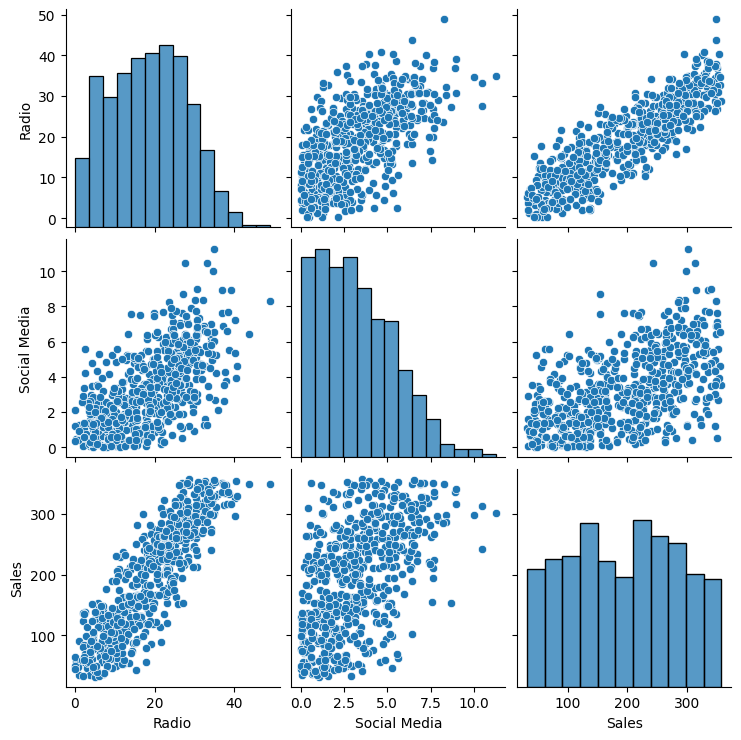

In [11]:
# Data Exploration
# Create a plot of pairwise relationships in the data. This will help you visualize the 
# relationships and check model assumptions.
sns.pairplot(data)


In [12]:
#  Model Building
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data = data[["Radio", "Sales"]]

In [13]:
# Display first 10 rows of the new DataFrame
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [14]:
# Write the linear regression formula.
# Save it in a variable.
ols_formula = "Sales ~ Radio"

In [15]:
# implement the ordinary least squares (OLS) approach for linear regression.
#  Implement OLS
OLS = ols(formula = ols_formula, data = ols_data)


In [16]:
# Fit the model to the data.
# Save the fitted model in a variable.
model = OLS.fit()

In [17]:
#  Results and evaluation
# Get summary of results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          2.07e-176
Time:                        13:45:08   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Next, analyze the bottom table from the results summary. Based on the table, identify the 
# coefficients that the model determined would generate the line of best fit. The coefficients are the
# y-intercept and the slope.
#  y-intercept is 41.5326   the slope is 8.1733 
#  sales = 8.1733 * radio promotion budget + 41.5326
#  company sales would increase on average by 8.1733 per million 

<Axes: xlabel='Radio', ylabel='Sales'>

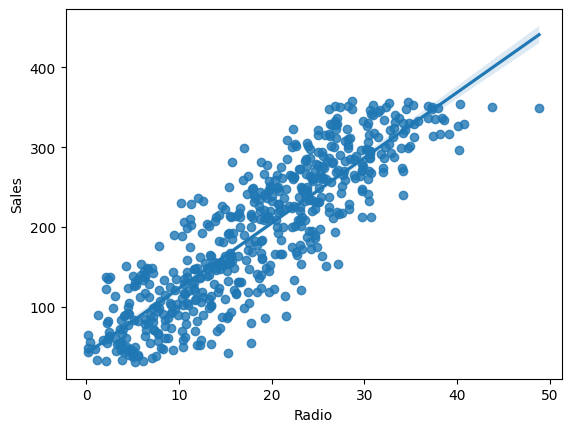

In [18]:
# Now that you've built the linear regression model and fit it to the data, finish checking 
# the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit 
# regression line.

# Plot the OLS data with the best fit regression line.

sns.regplot(x = "Radio", y = "Sales", data = ols_data)

In [ ]:
# The preceding regression plot illustrates an approximately linear relationship between the two variables
# along with the best fit line. This confirms the assumption of linearity.


In [19]:
# check the normality assumption. Get the residuals from the model.
# Get the residuals from the model

residuals = model.resid


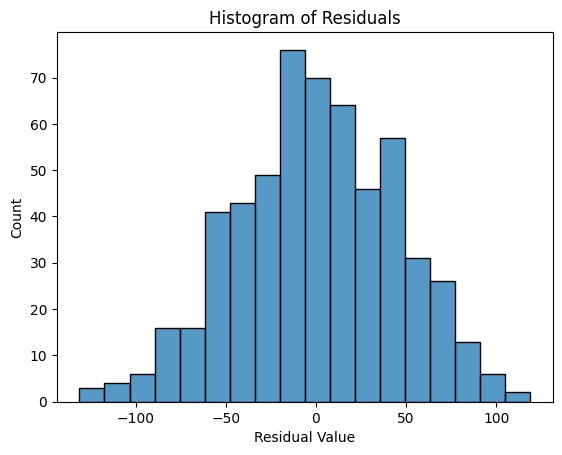

In [20]:
# Visualize the distribution of the residuals.
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

In [ ]:
# Based on the preceding visualization, the distribution of the residuals is approximately normal. 
# This indicates that the assumption of normality is likely me

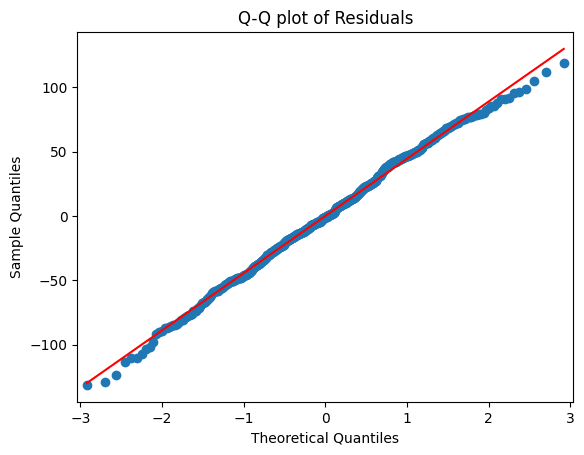

In [21]:
# create a Q-Q plot to confirm the assumption of normality.

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()


In [ ]:
# In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. 
# This confirms that the normality assumption is met.

In [22]:
# Now, check the assumptions of independent observation and homoscedasticity. 
# Start by getting the fitted values from the model.
# Get fitted values.
fitted_values = model.predict(ols_data["Radio"])

Text(0, 0.5, 'Residuals')

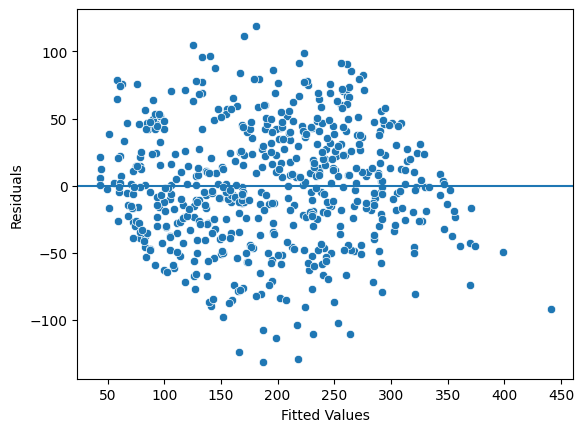

In [23]:
# Create a scatterplot of residuals against fitted values.
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

In [ ]:
# In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow 
# an explicit pattern. So it appears that the independent observation assumption has not been violated. 
# Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

In [ ]:
# Evaluate simple linear regression lab

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the statsmodel module and the ols function
# Import the statsmodels.api Python module using its common 
# abbreviation, sm, along with the ols() function from statsmodels.formula.api

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# Load the dataset
data = pd.read_csv(r"D:\VSCODE\marketing_and_sales_data_evaluate_lr.csv")

# Display the first five rows

data.head()


,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [5]:
# Step 2: Data exploration
# Display the shape of the data as a tuple (rows, columns).

data.shape

(4572, 4)

In [7]:
# Explore the independent variables
# Generate descriptive statistics about TV, Radio, and Social_Media.
data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


In [8]:
# Explore the dependent variable
# Before fitting the model, ensure the Sales for each promotion (i.e., row) is present. 
# If the Sales in a row is missing, that row isn't of much value to the simple linear regression model.

# Display the percentage of missing values in the Sales column in the DataFrame data
# Calculate the average missing rate in the sales column.

missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.
missing_sales = round(missing_sales * 100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Missing Sales Promotion Percentage: ' + str(missing_sales) +'%')


Missing Sales Promotion Percentage: 0.13%


In [9]:
#  0.13% of the sales values is missing

# Remove the missing data
# Remove all rows in the data from which Sales is missing.
# Subset the data to include rows where Sales is present.

subset_data = data['Sales'].dropna(axis=0)



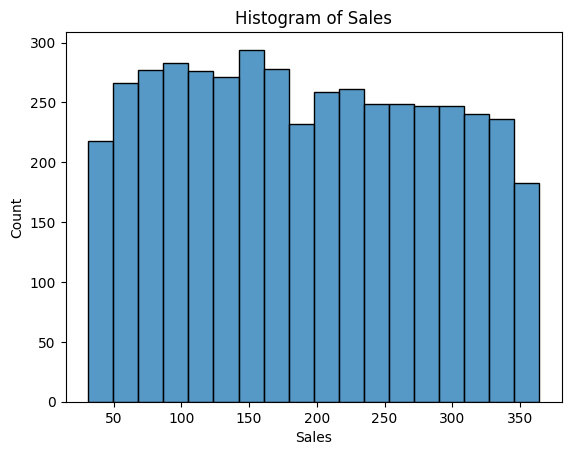

In [10]:
# Visualize the sales distribution
# Create a histogram to visualize the distribution of Sales.
fig = sns.histplot(subset_data)
fig.set_xlabel("Sales")
fig.set_title("Histogram of Sales")
plt.show()


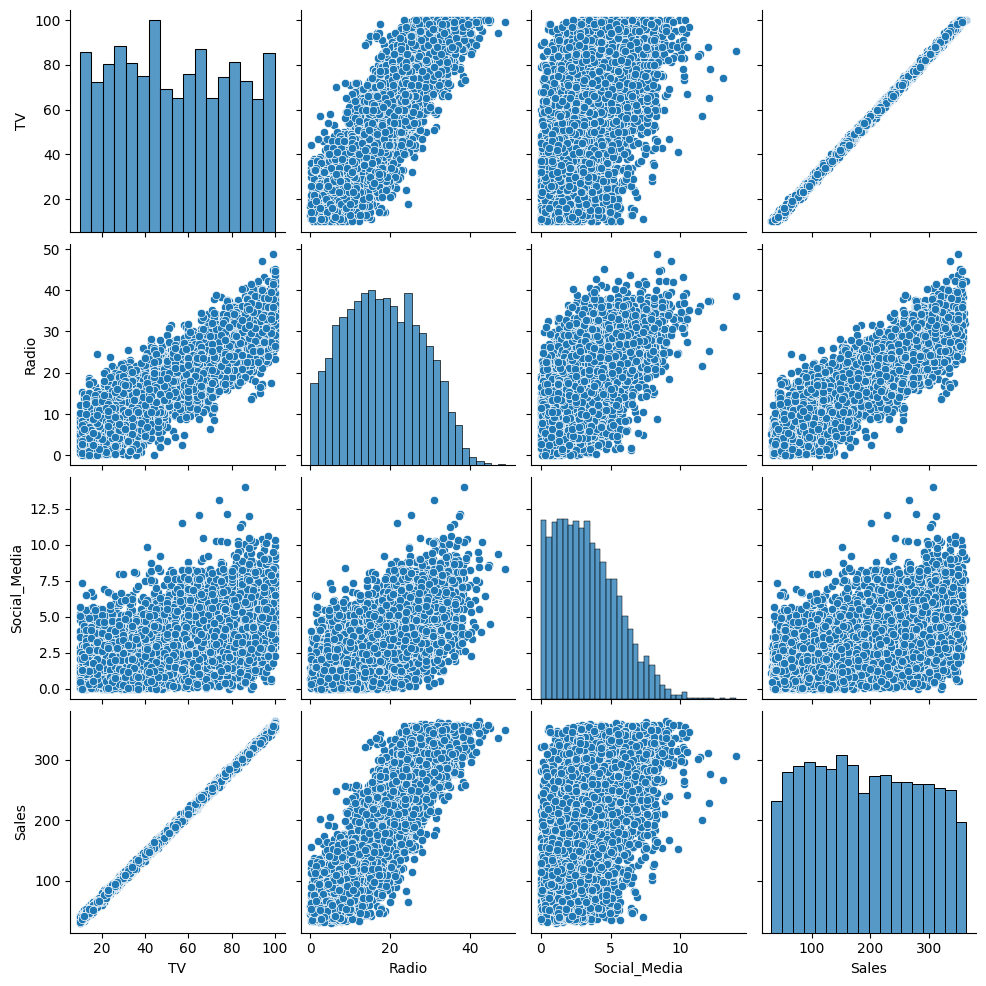

In [11]:
# Step 3: Model building
# Create a pairplot of the data.

sns.pairplot(data)

In [13]:
# Build and fit the model
# Define the OLS formula.

ols_formula = "Sales ~ TV"

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()
# Display the model results.

model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:32:29   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='TV', ylabel='Sales'>

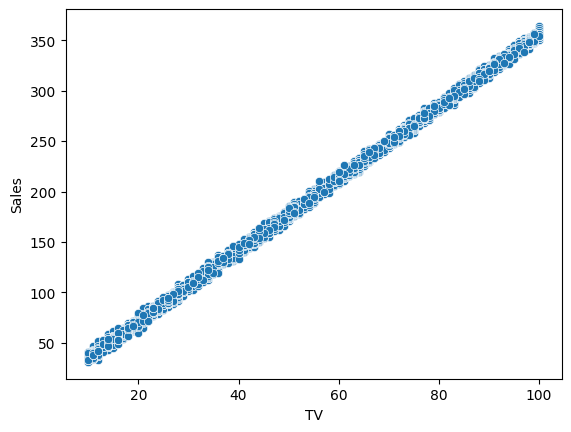

In [14]:
# Check model assumptions
# Linearity - Independent Observations - Normality - Homoscedasticity
# Model assumption: Linearity

# Create a scatterplot comparing X and Sales (Y)

sns.scatterplot(x = data['TV'], y = data['Sales'])

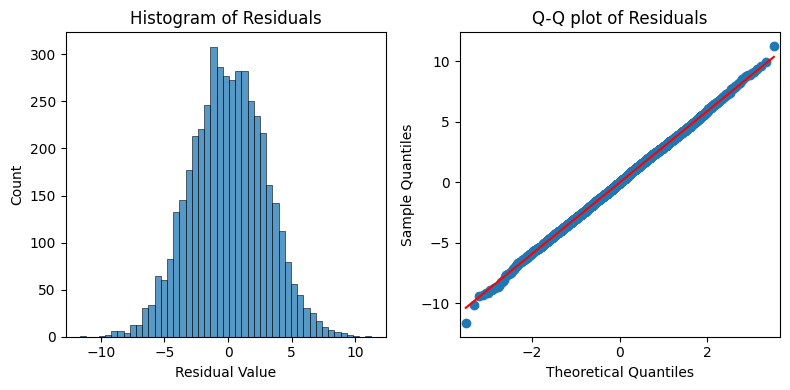

In [22]:
#  The data is in a straight line clearly showing linearity

# Model assumption: Normality The normality assumption states that the errors are normally distributed.
# Create two plots to check this assumption:

# Plot 1: Histogram of the residuals
# Plot 2: Q-Q plot of the residuals
# Calculate the residuals.
residuals = model.resid


# Create a 1x2 plot figures.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s', ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Q-Q plot of Residuals")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

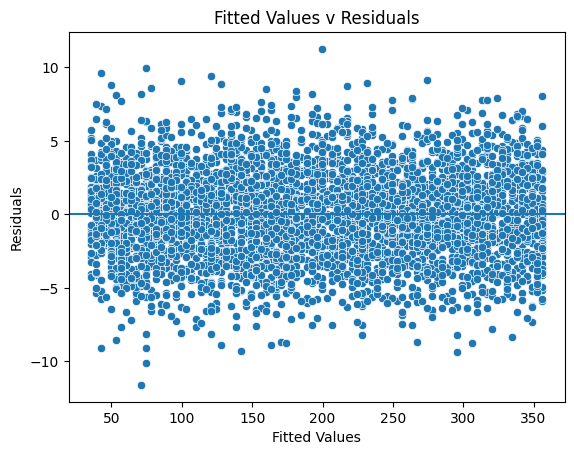

In [23]:
# Model assumption: Homoscedasticity
# The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X
# Create a scatterplot with the fitted values from the model and the residuals.


fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0) 

# Show the plot.
plt.show()

In [24]:
# Step 4: Results and evaluation
# Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficient
# Display the model_results defined previously
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:32:29   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Module 3 follow along lab
#  Multi Linear regression follow along lab

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins", cache=False)

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Data cleaning (not shown in video)

# Subset data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Reset index
penguins.reset_index(inplace=True, drop=True)

In [4]:
# Examine first 5 rows of data
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie


In [5]:
# Create holdout sample
# Subset X and y variables
penguins_X = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

In [13]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.0 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.0 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.0 MB 1.6 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 1.7 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.0 MB 1.7 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.0 MB 1.9 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.0 MB 2.0 MB/s eta 0:00:04
   ------------------ --------------------- 5.0/11.0 MB 2.1 MB/s eta 0:00:03
   -----------------

In [6]:
# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

In [7]:
# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y, 
                                                    test_size = 0.3, random_state = 42)

In [ ]:
# Note: We have set the test_size variable to 0.3, which tells the function what proportion of the data should be in the holdout 
# sample. Additionally, we have set the random_state variable equal to 42 for reproducibility. If you change the random_state, 
# your holdout sample and training data sets will be different, so your model may perform differently

In [ ]:
# Model construction
# In this part of the course, we'll focus on understanding some of the variables' relationships with body mass (g). We'll use one
# continuous X variable, bill length (mm), and the two categorical variables, gender and species.

# First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the 
# tilde (~), and then each of the X variables separated by a plus sign (+). We can use C() to indicate a categorical variable. This 
# will tell the ols() function to one hot encode those variables in the model. Please review the previous course materials as needed 
# to review how and why we code categorical variables for regression.

In [8]:
# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"
# Capital C lets statsmodels know they are catergorical varibles

In [9]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols

In [ ]:
# After we've imported the ols() function, we can save the ols_data as a dataframe, create the ols object, fit the model, and 
# generate summary statistics. At this point, it would make sense to double check the model assumptions about errors 
# (homoscedasticity and normality of residuals). Please review other resources in the program as needed.

In [10]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [ ]:
# Model evaluation and interpretation

In [11]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.31e-92
Time:                        10:27:20   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# C(gender) - Male
# Given the name of the variable, we know that the variable was encoded as Male = 1, Female = 0. This means that female penguins are 
# the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams 
# more than a female penguin's body mass.

# C(species) - Chinstrap and Gentoo
# Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin 
# and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a 
# body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the 
# same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than
# the Adelie penguin.

# Bill length (mm)
# Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one 
# penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the 
# penguin with the shorter bill.

In [ ]:
# Model 3 activity Lab: Perform multiple linear regression

In [25]:
# Import libraries and modules.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [15]:
# Load dataset

data = pd.read_csv(r"D:\VSCODE\marketing_sales_data.csv")

In [16]:
# Display the first five rows.
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


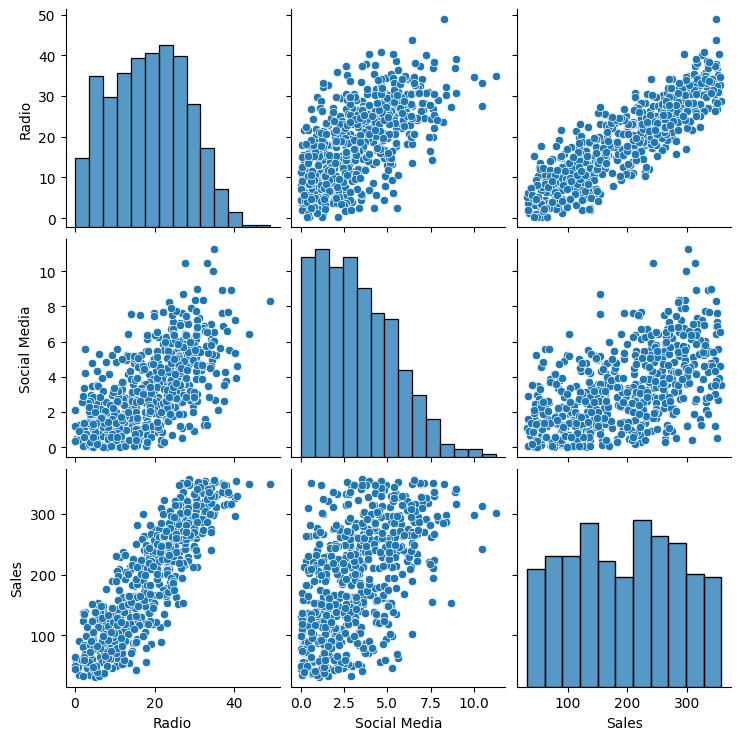

In [17]:
# Step 2: Data exploration
# Create a pairplot of the data.

sns.pairplot(data)

In [18]:
#  Calculate the mean sales for each TV category.
data.groupby('TV')['Sales'].mean()



TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

In [19]:
# Calculate the mean sales for each Influencer category
data.groupby('Influencer')['Sales'].mean()

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64

In [20]:
# Remove missing data
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

In [21]:
# Clean column names
# Rename all columns in data that contain a space.
data = data.rename(columns={'Social Media': "Social_Media"})

In [22]:
# Step 3: Model building
# Fit a multiple linear regression model that predicts sales
#  fit a multiple linear regression model that predicts Sales using two or more independent variables from data

# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.61e-287
Time:                        11:49:22   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

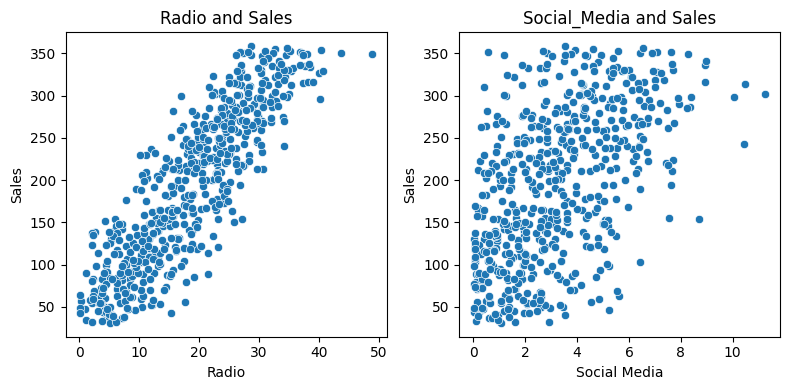

In [26]:
# Check model assumptions
# For multiple linear regression, there is an additional assumption added to 
# the four simple linear regression assumptions: multicollinearity.
# Model assumption: Linearity
# Create a scatterplot for each independent variable and the dependent variable.
# Create a 1X2 plot figure

fig, axes = plt.subplots(1, 2, figsize = (8,4))
# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

# Set the title of the first plot
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales
sns.scatterplot(x=data['Social_Media'], y = data['Sales'],ax=axes[1])

# Set the title of the second plot
axes[1].set_title('Social_Media and Sales')

# Set the xlabel of the second plot
axes[1].set_xlabel("Social Media")

# Use matplotlib tight_layout() function to add space between plots for a cleaner look
plt.tight_layout()



<function matplotlib.pyplot.show(close=None, block=None)>

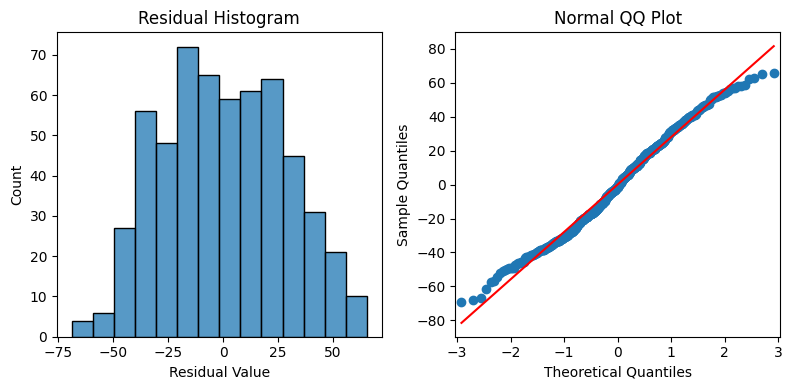

In [27]:
# Model assumption: Independence
# Model assumption: Normality
# Create the following plots to check the normality assumption:

# Plot 1: Histogram of the residuals
# Plot 2: Q-Q plot of the residuals

# First calculate the residuals
residuals = model.resid

# Create a 1X2 plot figure
fig, axes = plt.subplots(1,2, figsize = (8,4))

# Create a histogram with the residuals
sns.histplot(residuals, ax=axes[0])

# Set the x labelof the residual plot
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot
axes[0].set_title("Residual Histogram")

# Create a Q-Q Plot of the residuals

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot 
axes[1].set_title("Normal QQ Plot")

# Use matplotlib tight_layout() to add space betwee plots
plt.tight_layout()

# Show the plot
plt.show


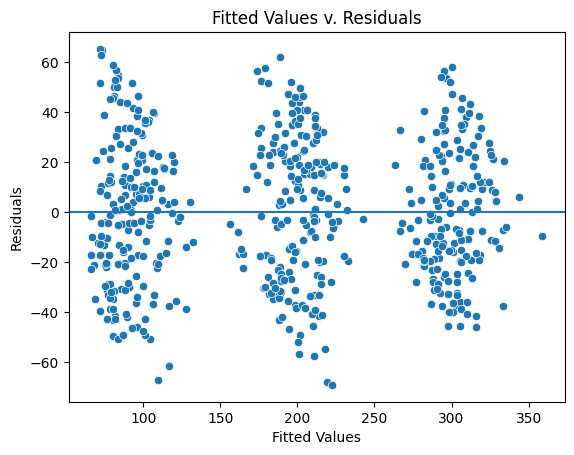

In [28]:
# Model assumption: Constant variance
"""Check that the constant variance assumption is not violated by creating a 
scatterplot with the fitted values and residuals. Add a line at  𝑦=0
to visualize the variance of residuals above and below  𝑦=0 ."""
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0
fig.axhline(0)

# Show the plot.
plt.show()


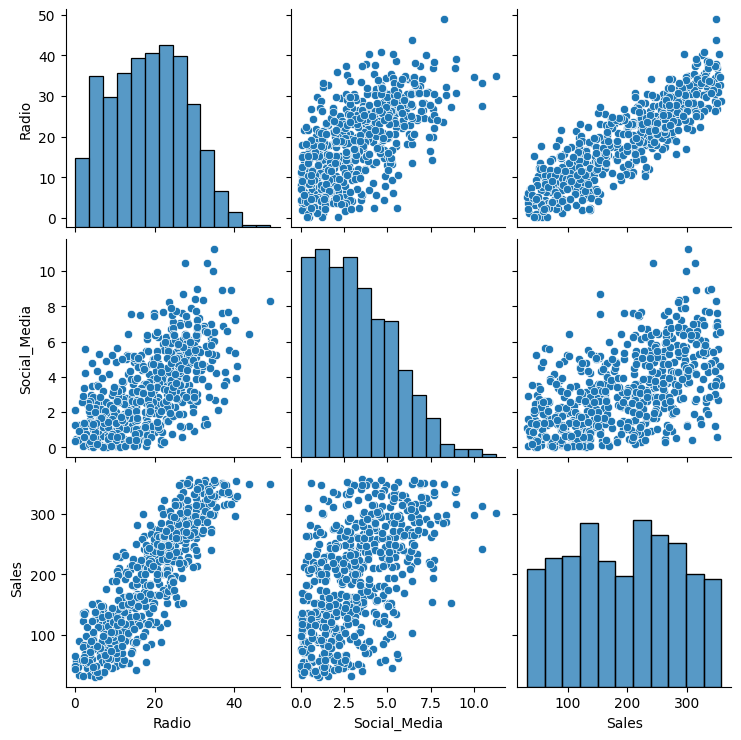

In [30]:
# Model assumption: No multicollinearity
# The no multicollinearity assumption states that no two independent variables 
# ( 𝑋𝑖 and  𝑋𝑗) can be highly correlated with each other.
# Two common ways to check for multicollinearity are to:

# Create scatterplots to show the relationship between pairs of independent variables
# Use the variance inflation factor to detect multicollinearity
# Use one of these two methods to check your model's no multicollinearity assumption.
# Create a pairplot of the data.
sns.pairplot(data)


In [31]:
# Calculate the variance inflation factor (optional).
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


In [32]:
# Step 4: Results and evaluation
# Display the OLS regression results
# Display the model results summary.
model_results



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.61e-287
Time:                        11:49:22   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Interpret model coefficients
# With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.61e-287
Time:                        11:49:22   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
    """Question: What are the model coefficients?

When TV and Radio are used to predict Sales, the model coefficients are:

𝛽0=218.5261
𝛽𝑇𝑉𝐿𝑜𝑤=−154.2971
𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚=−75.3120
𝛽𝑅𝑎𝑑𝑖𝑜=2.9669
Question: How would you write the relationship between Sales and the independent variables as a linear equation?

Sales=𝛽0+𝛽1∗𝑋1+𝛽2∗𝑋2+𝛽3∗𝑋3

Sales=𝛽0+𝛽𝑇𝑉𝐿𝑜𝑤∗𝑋𝑇𝑉𝐿𝑜𝑤+𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+𝛽𝑅𝑎𝑑𝑖𝑜∗𝑋𝑅𝑎𝑑𝑖𝑜

Sales=218.5261−154.2971∗𝑋𝑇𝑉𝐿𝑜𝑤−75.3120∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+2.9669∗𝑋𝑅𝑎𝑑𝑖𝑜

Question: What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium or Low TV categories compared to the High TV category when Radio is at the same level.

For example, the model predicts that a Low TV promotion is 154.2971 lower on average compared to a high TV promotion given the same Radio promotion.

The coefficient for Radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is 0.000
, meaning all coefficients are statistically significant at 𝑝=0.05
. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a 95%
 chance that the interval [−163.979,−144.616]
 contains the true parameter of the slope of 𝛽𝑇𝑉𝐿𝑜𝑤
, which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

Question: Why is it important to interpret the beta coefficients?

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

Question: What are you interested in exploring based on your model?

Potential areas to explore include:

Providing the business with the estimated sales given different TV promotions and radio budgets
Additional plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line
Question: Do you think your model could be improved? Why or why not? How?

Given how accurate TV was as a predictor, the model could be improved by getting a more granular view of the TV promotions, such as by considering more categories or the actual TV promotional budgets.

Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy._s
Considerations
What are some key takeaways that you learned from this lab?

Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.
What findings would you share with others?

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a Low TV promotion is 154.2971 lower on average than a high TV promotion given the same Radio promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝=0.05
 . The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95%
  chance the interval  [−163.979,−144.616]
  contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
 , which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.

How would you frame your findings to stakeholders?

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by  $75.3120
  million (95% CI  [−82.431,−68.193])
 , and switching from a high to low TV promotional budget reduces sales by  $154.297
  million (95% CI  [−163.979,−144.616])
 . The model also estimates that an increase of  $1
  million in the radio promotional budget will yield a  $2.9669
  million increase in sales (95% CI  [2.551,3.383]
 ).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales.  
    """

In [1]:
# Chi-squared test
import scipy.stats as stats
observations = [650, 570, 420, 480, 510, 380, 490]
expectations = [500, 500, 500, 500, 500, 500, 500]
result = stats.chisquare(f_obs=observations, f_exp=expectations)
result

Power_divergenceResult(statistic=np.float64(97.6), pvalue=np.float64(7.943886923343835e-19))

In [2]:
import numpy as np
import scipy.stats as stats
observations = np.array([[850, 450],[1300, 900]])
result = stats.contingency.chi2_contingency(observations, correction=False)
result

Chi2ContingencyResult(statistic=np.float64(13.660757846804358), pvalue=np.float64(0.00021898310129108426), dof=1, expected_freq=array([[ 798.57142857,  501.42857143],
       [1351.42857143,  848.57142857]]))

In [1]:
# One-way and two-way ANOVA (Part I) Activity
 
#  import packages
import pandas as pd
import seaborn as sns


In [2]:
# Load in diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Data cleaning I (not shown in video)
# Check how many diamonds are each color grade
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
# Subset for colorless diamonds
colorless = diamonds[diamonds["color"].isin(["E","F","H","D","I"])]

# Select only color and price columns, and reset index
colorless = colorless[["color","price"]].reset_index(drop=True)

In [5]:
# Remove dropped categories of diamond color
colorless.color = colorless.color.cat.remove_categories(["G","J"])

# Check that the dropped categories have been removed
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [6]:
# Import math package
import math

# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

In [7]:
# Drop rows with missing values
colorless.dropna(inplace=True)

# Reset index
colorless.reset_index(inplace=True, drop=True)

In [8]:
# Examine first 5 rows of cleaned data set
colorless.head()


,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [9]:
# One-way ANOVA
# To run one-way ANOVA, we first load in the data, and save
# it as a variable called diamonds, and then examine it using the head() function

# Save to diamonds.csv
colorless.to_csv('diamonds.csv')


In [10]:
# Save diamonds.csv as a variable called diamonds
diamonds = pd.read_csv('diamonds.csv')

In [11]:
# Examine first 5 rows of diamonds 
diamonds.head()


,Unnamed: 0,color,price,log_price
0,0,E,326,5.786897
1,1,E,326,5.786897
2,2,E,327,5.789960
3,3,I,334,5.811141
4,4,I,336,5.817111


In [ ]:
''' Recall that one-way ANOVA helps us better understand the relationship between a categorical variable and a continuous variable. We'll do some basic exploratory data analysis by creating a boxplot using the boxplot() function from the seaborn package.

Based on the plot, we can observe that there is a lot of overlap in the distribution of log_price for each color of diamond. But we can't tell yet if they are statistically significantly different.'''

<Axes: xlabel='color', ylabel='log_price'>

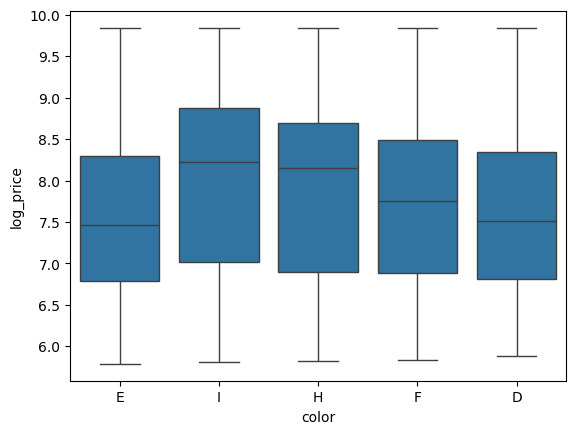

In [12]:
# Create boxplot to show distribution of price by color grade
sns.boxplot(x = 'color', y = 'log_price', data = diamonds)

In [ ]:
''' In order to run ANOVA we need to create a regression model.  To do this we'll import the statsmodel.api package and the ols() function. Next, we'll 
create a simple linear regression model where the X variable is color, which we will code as categorical using C(). Then we'll fit the model to the data 
and generate model summary statistics'''

In [13]:
# import statsmodels and ols function

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
# Construct simple linear regression model, and fir the model
model = ols(formula = 'log_price ~ C(color)', data = diamonds).fit()

In [16]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          3.61e-225
Time:                        11:38:18   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''Based on the model summary table, the color grades' associated 
beta coefficients all have a p-value of less than 0.05 (check the P>|t| column). But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.
Null hypothesis - There is no difference in the price of diamonds based on color grade
Alternative Hypothesis - There is a difference in the price of diamonds based on color grade
'''

In [17]:
# Run one way ANOVA

sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [18]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [19]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [ ]:
# We use the anova_lm() function from the statsmodels.stats package. As noted previously, the function requires a fitted regression 
# model, and for us to specify the type of ANOVA: 1, 2, or 3

In [ ]:
# Data cleaning II

In [20]:
# Import diamonds data set from seaborn package
diamonds = sns.load_dataset('diamonds', cache=False)

In [21]:
# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
'''Below, we go through a very similar process as above. We start by selecting the columns of interest: color, cut, and price. Then, we subset only for certain color grades, and remove the dropped colors from the list of categories using the remove_categories() function.

Next, we subset for specific diamond cuts: Ideal, Premium, and Very Good, and remove the dropped cuts from the list of categories.

Next, we remove rows with missing data, and reset the index.

Lastly, we add in a column for the logarithm of the price'''

In [22]:
# Subset for color, cut, price columns
diamonds2 = diamonds[['color','cut','price']]

# Only include colorless diamonds
diamonds2 = diamonds2[diamonds2['color'].isin(['E','F','H','D','I'])]

#  Drop removed colors, G and J
diamonds2.color = diamonds2.color.cat.remove_categories(['G','J'])

#  Only include ideal, premium, and very good diamonds
diamonds = diamonds2[diamonds2['cut'].isin(['Ideal', 'Premium','Very Good'])]

# Drop removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(['Good','Fair'])

# Drop Nans
diamonds2.dropna(inplace = True)

# Reset index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for Logarithm of price
diamonds2.insert(3,'log_price',[math.log(price) for price in diamonds2['price']])


In [23]:
# Examine the data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [25]:
# Save as diamonds2.csv
diamonds2.to_csv('diamonds2.csv',index=False, header=list(diamonds2.columns))


In [26]:
# Two-Way ANOVA
# Now we can load in the dataset we just created using the read_csv() function from pandas

# Load the data set
diamonds2 = pd.read_csv('diamonds2.csv')


In [27]:
# Examine the first 5 rows of the data set
diamonds2.head()


,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [ ]:
'''
Then we'll create a multiple linear regression model using the ols() function, fit the model to the data, and get the summary statistics.

Note: This regression model includes two categorical X variables: color and cut, and a variable to account for the interaction between color and cut. The interaction is denoted using the : symbol.
'''

In [28]:
# Construct a multiple linear regression with an interaction term between color and cut

model2 = ols(formula = 'log_price ~ C(color) + C(cut) +C(color):C(cut)', data=diamonds2).fit()


In [29]:
# Get summary statistics

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:54:36   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
''' Null Hypothesis (Color) - There is no difference in the price of diamonds based on color.

Alternative Hypothesis (Color) - There is a difference in the price of diamonds based on color.

Null Hypothesis (Cut) - There is no difference in the price of diamonds based on cut.

Alternative Hypothesis (Cut) - There is a difference in the price of diamonds based on cut.

Null Hypothesis (Interaction) - The effect of color on diamond price is independent of the cut, and vice versa.

Alternative Hypothesis (Interaction - There is an interaction effect between color and cut on diamond price.

In [30]:
# The syntax for a two-way ANOVA is the same as for a one-way ANOVA. We will continue to use the anova_lm() function from statsmodels.stats.

# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [31]:
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [32]:
sm.stats.anova_lm(model2, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [ ]:
# ANOVA post hoc test (Part II)

In [33]:
# Import statsmodels package and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
# Load in the data set from one-way ANOVA
diamonds = pd.read_csv("diamonds.csv")

In [35]:
# One-way ANOVA
# Build a simple linear regression model - Check the results - Run one-way ANOVA

# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

# Get summary statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          3.61e-225
Time:                        15:21:26   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [37]:
# Post hoc test
# One of the most common ANOVA post hoc tests is the Tukey's HSD (honestly significantly different) 
# test. We can import the pairwise_tukeyhsd() function from the statsmodels package to run the test.

# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [39]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"], alpha = 0.05)

In [40]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


In [ ]:
'''Each row represents a pariwise comparison between the prices of two diamond color grades. 
The reject column tells us which null hypotheses we can reject. Based on the values 
in that column, we can reject each null hypothesis, except when comparing D and E color 
diamonds. We cannot reject the null hypothesis that the diamond price of D and E color 
diamonds are the same.

Test 1: D vs. E Result: We cannot reject the null hypothesis that the price of D and E color grade diamonds are the same.

Test 2: D vs. F Result: We can reject the null hypothesis that the price of D and F color grade diamonds are the same

Test 3: D vs. H Result: We can reject the null hypothesis that the price of D and H color grade diamonds are the same.

Test 4: D vs. I Result: We can reject the null hypothesis that the price of D and I color grade diamonds are the same.

Test 5: E vs. F Result: We can reject the null hypothesis that the price of E and F color grade diamonds are the same.

Test 6: E vs. H **Result:** We *can* reject the null hypothesis that the price of E and H color grade diamonds are the same.

Test 7: E vs. I Result: We *can* reject the null hypothesis that the price of E and I color grade diamonds are the same.

Test 8: F vs. H Result: We *can* reject the null hypothesis that the price of F and H color grade diamonds are the same.

Test 9: F vs. I Result: We *can* reject the null hypothesis that the price of F and I color grade diamonds are the same

Test 10: H vs. I Result: We *can* reject the null hypothesis that the price of H and I color grade diamonds are the same.

'''

In [ ]:
# Activity: Hypothesis testing with Python

In [1]:
# import libraries and packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
#  import data 

data = pd.read_csv("D:\VSCODE\marketing_sales_data.csv")

# Display the first five rows
data.head()


<>:3: SyntaxWarning: invalid escape sequence '\V'
<>:3: SyntaxWarning: invalid escape sequence '\V'
C:\Users\foggd\AppData\Local\Temp\ipykernel_26256\661298660.py:3: SyntaxWarning: invalid escape sequence '\V'
  data = pd.read_csv("D:\VSCODE\marketing_sales_data.csv")


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


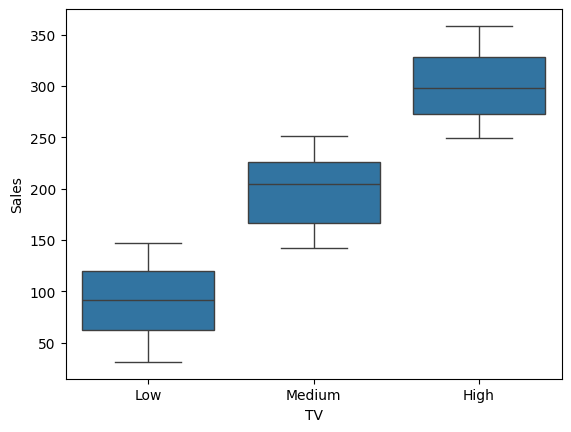

In [3]:
# Step 2: Data exploration
# Create a boxplot with TV and Sales.
sns.boxplot(x = 'TV', y = 'Sales', data = data);

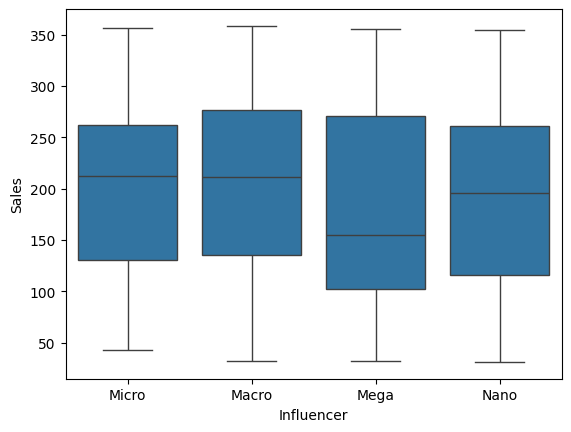

In [4]:
# Create a boxplot with Influencer and Sales.
sns.boxplot(x = 'Influencer', y = 'Sales', data = data);

In [5]:
# Remove missing data
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

# Confirm the data contain no missing values
data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [6]:
# Step 3: Model building
# Fit a linear regression model that predicts Sales using one of the independent categorical variables in data.
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          8.81e-256
Time:                        18:22:33   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

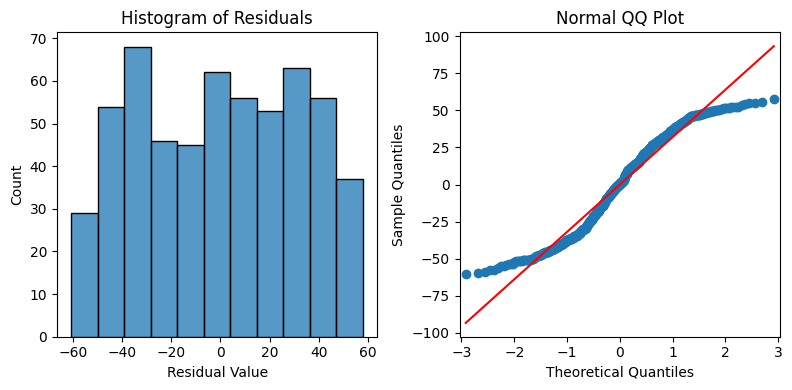

In [7]:
# Check model assumptions
# Now, check the four linear regression assumptions are upheld for your model
# verify that the normality assumption is upheld for the model.
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
# There is reasonable concern that the normality assumption 
# is not met when TV is used as the independent variable predicting Sales. 
# The normal q-q forms an 'S' that deviates off the red diagonal line, which is not 
# desired behavior.

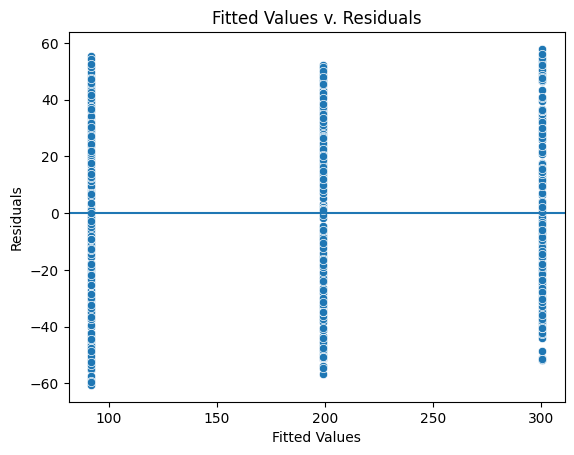

In [8]:
# verify the constant variance (homoscedasticity) assumption is met for this model.
# Create a scatter plot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0

fig.axhline(0)

# Show the plot
plt.show()


In [ ]:
# The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

In [9]:
# Step 4: Results and evaluation
# display the OLS regression results

# Display the model results summary
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          8.81e-256
Time:                        18:22:33   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''Given how accurate TV was as a predictor, the model 
could be improved with a more granular view of the TV promotions, such as additional categories or the actual TV promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy.'''

In [10]:
# Perform a one-way ANOVA test

# Create an one-way ANOVA table for the fit model
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


In [ ]:
'''The null hypothesis is that there is no difference in Sales based on the TV promotion budget.

The alternative hypothesis is that there is a difference in Sales based on the TV promotion budget.'''

In [11]:
# Perform an ANOVA post hoc test
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


In [ ]:
'''The first row, which compares the High and Low TV groups, indicates that you can reject the null hypothesis that there is no significant difference between the Sales of these two groups.

You can also reject the null hypotheses for the two other pairwise comparisons that compare High to Medium and Low to Medium

A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

The results were that Sales is not the same between any pair of TV groups.'''